
---

# **Spotify 2023: What Makes a Song Streamable?**

In this notebook, we'll explore the Spotify 2023 dataset to understand the features that make songs popular and highly streamable.



---
## Data Loading and Preliminary Analysis


In [ ]:
import pandas as pd

data = pd.read_csv('spotify-2023.csv',encoding='latin-1')



## Let's check for missing values
### (Styling added for table)

In [ ]:
missing_values = data.isna().sum()
missing_values = missing_values[missing_values > 0]
print(missing_values)

in_shazam_charts    50
key                 95
dtype: int64


***The key represents the primary musical key of a track.***

Determining the key of a song can be a complex process, especially for tracks that have ambiguous tonal centers or change keys multiple times. This complexity might be a reason for the higher number of missing values in the key feature compared to others.

---

## `compute_distribution` Function

**What it does:**  
Calculates the percentage distribution of unique values in a given DataFrame column.

**Parameters:**  
- `df`: Input DataFrame.
- `column_name`: Column to analyze.

**How it works:**  
1. **Get Value Counts**: Uses `df[column_name].value_counts(normalize=True)` to get the relative frequency of each unique value.
2. **Convert to Percentage**: Multiplies the relative frequencies by 100.
3. **Sort**: Arranges the values in descending order.
4. **Format Output**: Resets the index and renames columns for clarity.
5. **Return**: Outputs a DataFrame with the unique values and their respective percentages.

---

In [ ]:
def compute_distribution(df, column_name):
    distribution = df[column_name].value_counts(normalize=True) * 100
    sorted_distribution = distribution.sort_values(ascending=False).reset_index()
    sorted_distribution.columns = [column_name.capitalize(), 'Percentage']
    return sorted_distribution

---


## Function: `bin_bpm`

**Purpose:**  
Bins BPM (Beats Per Minute) values into 'Slow', 'Medium', or 'Fast' categories.

**Steps:**  
1. **Set BPM Ranges**:
   - `0 to 100`: Slow
   - `100 to 130`: Medium
   - `130 and above`: Fast
2. **Assign Categories**: Uses `pd.cut()` to categorize BPM values.
3. **Add to DataFrame**: Creates a 'bpm_category' column with the assigned categories.
4. **Return**: Outputs the updated DataFrame.

---

In [ ]:
def bin_bpm(data):
    bins = [0, 100, 130, float('inf')]
    labels = ['Slow', 'Medium', 'Fast']
    data['bpm_category'] = pd.cut(data['bpm'], bins=bins, labels=labels, right=False)
    return data


# Bin the BPM values
data = bin_bpm(data)


## Data Visualization

To understand the distribution of various features, we'll visualize the data.

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

---

## Function: `plot_pie_chart`

**Purpose:**  
Creates a pie chart for given data.

**Parameters:**  
- `data`: DataFrame with percentages to plot.
- `title`: Title of the pie chart.
- `subplot_position`: Position of the pie chart in a subplot layout.

**Steps:**  
1. Set subplot position.
2. Plot pie chart with data percentages.
3. Use the first column of data as labels.
4. Set pie chart title.

---

In [ ]:
def plot_pie_chart(data, title, subplot_position):
    plt.subplot(2, 2, subplot_position)
    plt.pie(data['Percentage'], labels=data[data.columns[0]], autopct='%1.1f%%', startangle=140, colors=sns.color_palette("pastel", len(data)))
    plt.title(title)

---
## Function: `visualize_data`

**Purpose:**  
Visualizes song data with bar and pie charts.

**Parameters:**  
- `df`: DataFrame with song data.

**Steps:**  
1. Define a list of song parameters.
2. Compute average values for each parameter.
3. Create a bar chart showing average values of song parameters.
4. Create pie charts for key, mode, and BPM distributions.
5. Display all charts.

---

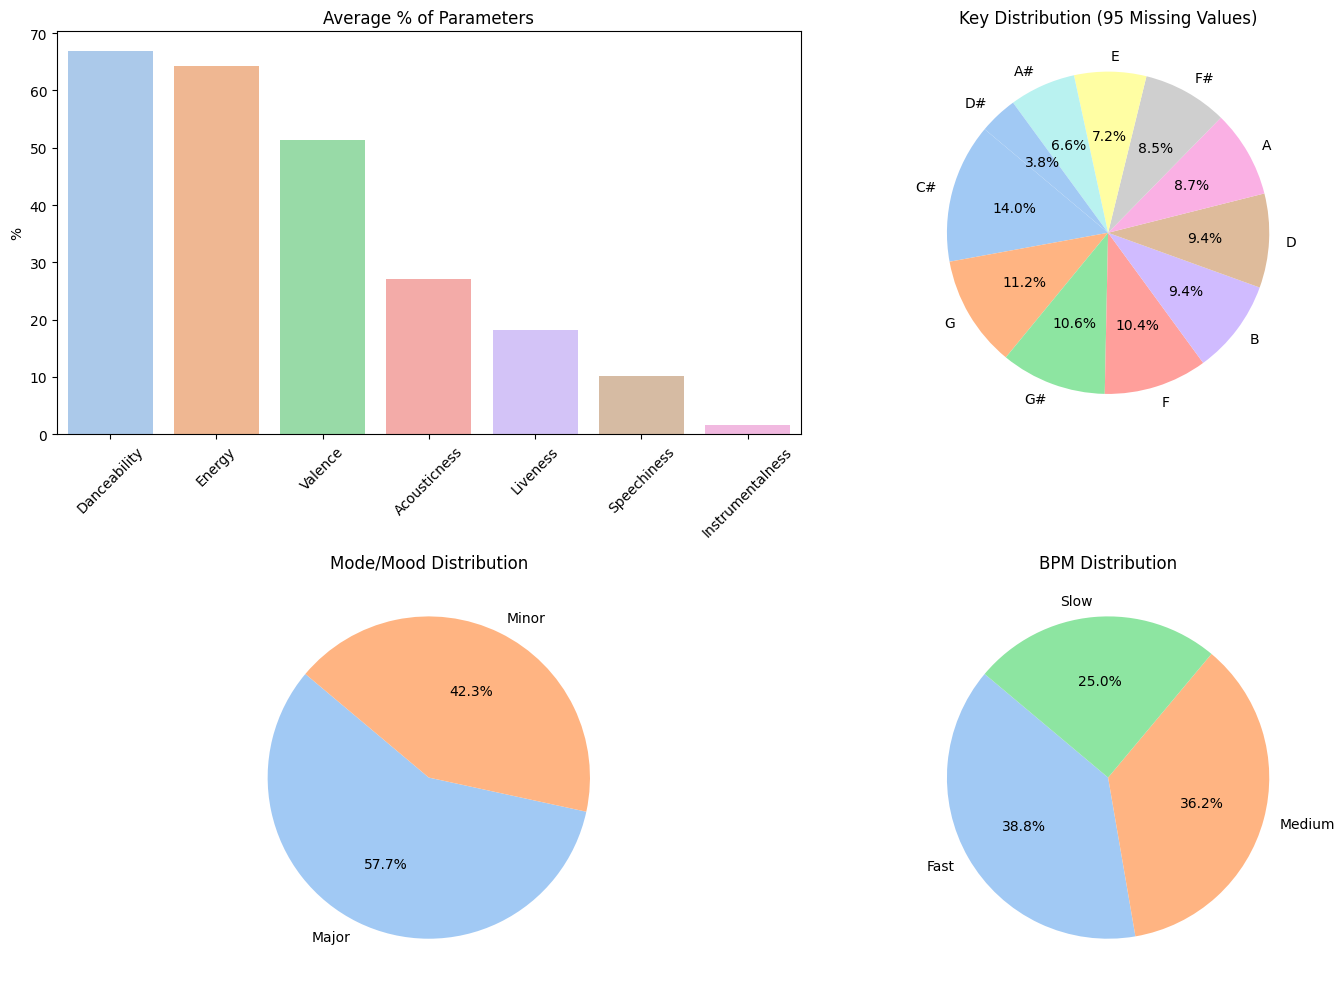

In [ ]:
def visualize_data(df):

    # List of parameters to compute mean values
    param_list = ['danceability_%', 'energy_%', 'valence_%', 'acousticness_%', 'liveness_%', 'speechiness_%', 'instrumentalness_%']

    # Compute mean values using a dictionary comprehension
    parameters = {param.split('_')[0].capitalize(): df[param].mean() for param in param_list}

    # Plotting
    plt.figure(figsize=(15, 10))

    # Bar chart for parameters
    plt.subplot(2, 2, 1)
    sns.barplot(x=list(parameters.keys()), y=list(parameters.values()), palette="pastel")
    plt.title('Average % of Parameters')
    plt.ylabel('%')
    plt.xticks(rotation=45)

    # Pie charts
    plot_pie_chart(compute_distribution(df, 'key'), 'Key Distribution (95 Missing Values)', 2)
    plot_pie_chart(compute_distribution(df, 'mode'), 'Mode/Mood Distribution', 3)
    plot_pie_chart(compute_distribution(df, 'bpm_category'), 'BPM Distribution', 4)

    plt.tight_layout()
    plt.show()


# Visualize the data
visualize_data(data)


---

## Executive Summary: Spotify 2023 Dataset Insights

The analysis of the Spotify 2023 dataset provides valuable insights into the musical characteristics of popular songs. Here's a concise summary of our findings:

1. **Musical Features**:
   - **Danceability**: On average, songs in the dataset have a high danceability score of 67%.
    - This suggests that a majority of the songs are suitable for dancing.
   - **Energy**: The average energy level is 64%
    - this indicates that most songs have a vibrant and fast tempo.
   - **Valence**: The songs have an average valence (positivity) score of 51%
    - This suggests a balanced mix of positive and negative moods.
   - **Acousticness**: Only 27% of the songs have a significant acoustic component.
    - This implies a preference for electronic or synthesized sounds.
   - **Liveness**: The liveness score averages at 18%.
    - This indicates that most tracks are studio recordings rather than live performances.
   - **Speechiness**: With an average of 10%
    - This suggests only a few songs have spoken words or rap.
   - **Instrumentalness**: A mere 2% of the songs are primarily instrumental.

2. **Key Distribution**:
   - The most common musical key is C#, followed by G and G#.
   - Less frequent keys include D# and A#.

3. **Mode Distribution**:
   - 57.7% of the songs are in the Major mode
    - This is often associated with a happier sound.
   - The remaining 42.3% are in the Minor mode.
    - This is typically linked to a sadder or more introspective mood.

4. **BPM (Beats Per Minute) Categories**:
   - **Fast**: 38.8% of the songs have a fast tempo.
   - **Medium**: 36.2% have a medium tempo.
   - **Slow**: 25% of the songs have a slower tempo.

In conclusion, the Spotify 2023 dataset reveals a preference for danceable, energetic tracks with a balanced mood. The data provides a snapshot of current musical trends, which can be invaluable for artists, producers, and music enthusiasts.

---